<a href="https://colab.research.google.com/github/Poojav21/Student_Performance_EDA-Analysis/blob/main/Student_Performace_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'student-performance-in-mathematics:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2969333%2F5149556%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240215%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240215T070559Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6e18cbaf7f88aebdc77fc92168fccbd8d2d7fbd410fe86311e6671c1f6c99c37e300c09c4eb40b3b2a5bef8147b8d75627af9b0e1354e639a4b4709222fa4b87f9c004e6f71d7d906f2cc5252ad0655947bc7333b5c3703b42df8f2cd016c1f17b9445e477202fb733b4629144acba8d6d98c647db4261c71d1f37b318c00ebdb08dd9d67a277fa41ffdffd7f7adbdb69e0dd5ca1602a59aa585ab886a61b184648e94986d53589855b615b5aa1fc41d1bda2956e44706e45cb2566d259e9f7f1179dc6e6c39df119b339e52bf68628fa4935e3d44ce9f8c075172fa73ab64c41b460f702bebb38f51677861479480f130357cff49fd0602d200df8334bc084a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 8871 bytes downloaded
Downloaded and uncompressed: student-performance-in-mathematics
Data source import complete.


In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-in-mathematics/exams.csv


In [36]:
df = pd.read_csv('/kaggle/input/student-performance-in-mathematics/exams.csv')

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [38]:
df.shape

(1000, 8)

In [39]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df = df.rename(columns = {"gender":"Gender", "race/ethnicity":"Race/Ethnicity", "parental level of education":"Parental Level Of Education","lunch":"Lunch", "test preparation course": "Test Preparation Course", "math score":"Math Score", "reading score":"Reading Score", "writing score":"Writing Score"})

In [46]:
df.columns


Index(['Gender', 'Race/Ethnicity', 'Parental Level Of Education', 'Lunch',
       'Test Preparation Course', 'Math Score', 'Reading Score',
       'Writing Score'],
      dtype='object')

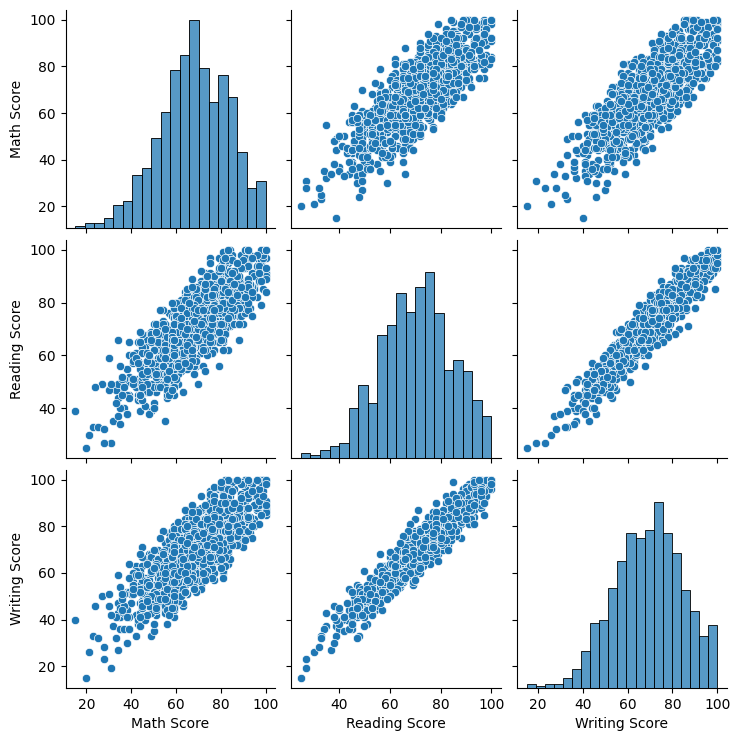

In [47]:
sns.pairplot(df)
plt.show()

Text(0, 0.5, 'Scores')

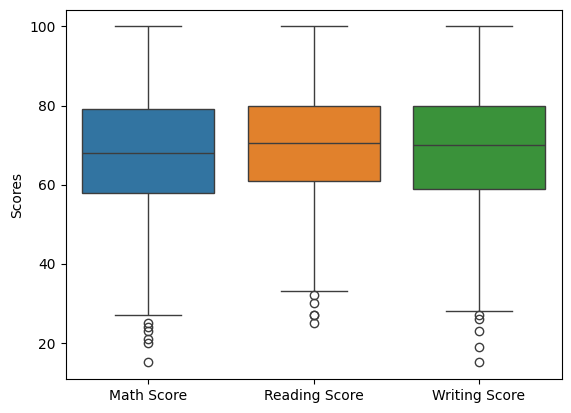

In [48]:
sns.boxplot(data=df)
plt.ylabel("Scores")

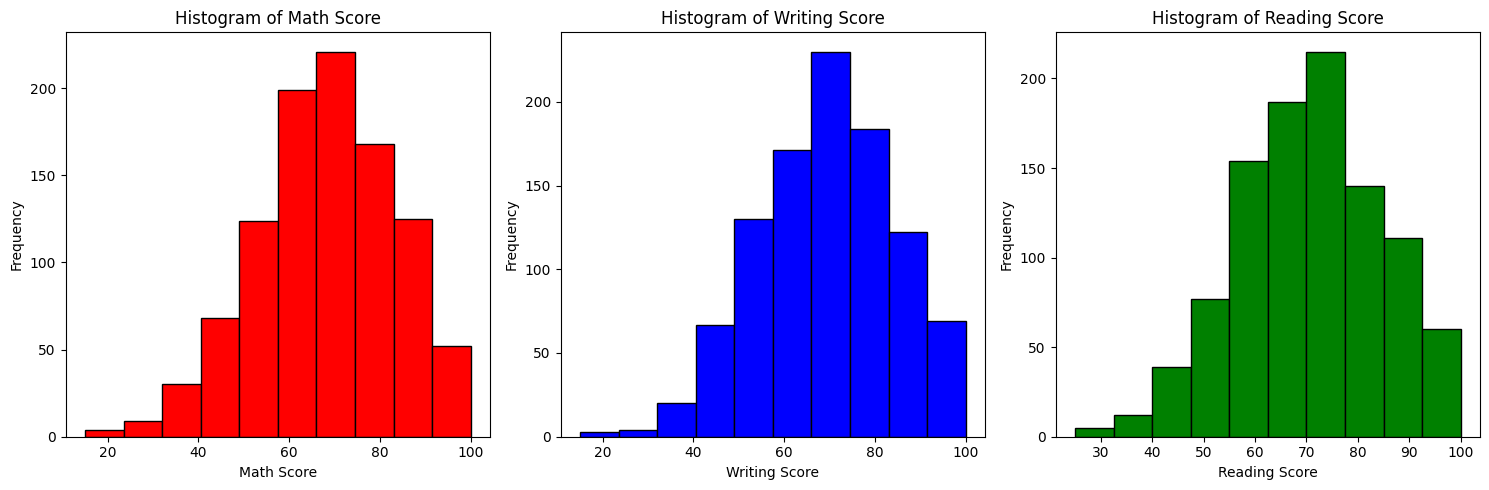

In [49]:
feat = ['Math Score', 'Writing Score', 'Reading Score']
color = ["red","blue",'green']
plt.figure(figsize=(15,5))
for i, (feature, color) in enumerate(zip(feat, color), 1):
    plt.subplot(1, 3, i)
    plt.hist(df[feature], color=color, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()



In [50]:
df['Gender'].value_counts()

male      508
female    492
Name: Gender, dtype: int64

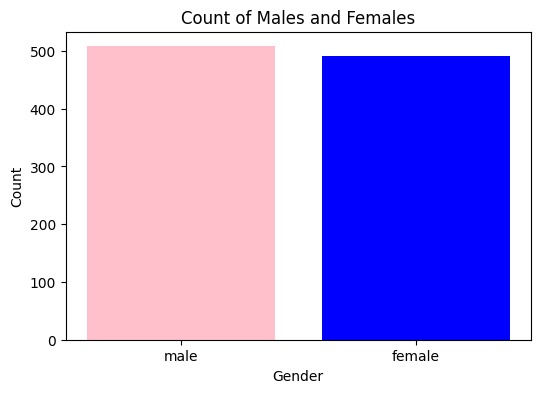

In [51]:
gender_counts = {'male': 508, 'female': 492}

# Extract labels and counts
labels = gender_counts.keys()
counts = gender_counts.values()

# Plot the chart
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Males and Females')
plt.show()


In [52]:
df['Parental Level Of Education'].unique()

array(['some college', "associate's degree", 'some high school',
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)

In [53]:
df['Parental Level Of Education'].value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: Parental Level Of Education, dtype: int64

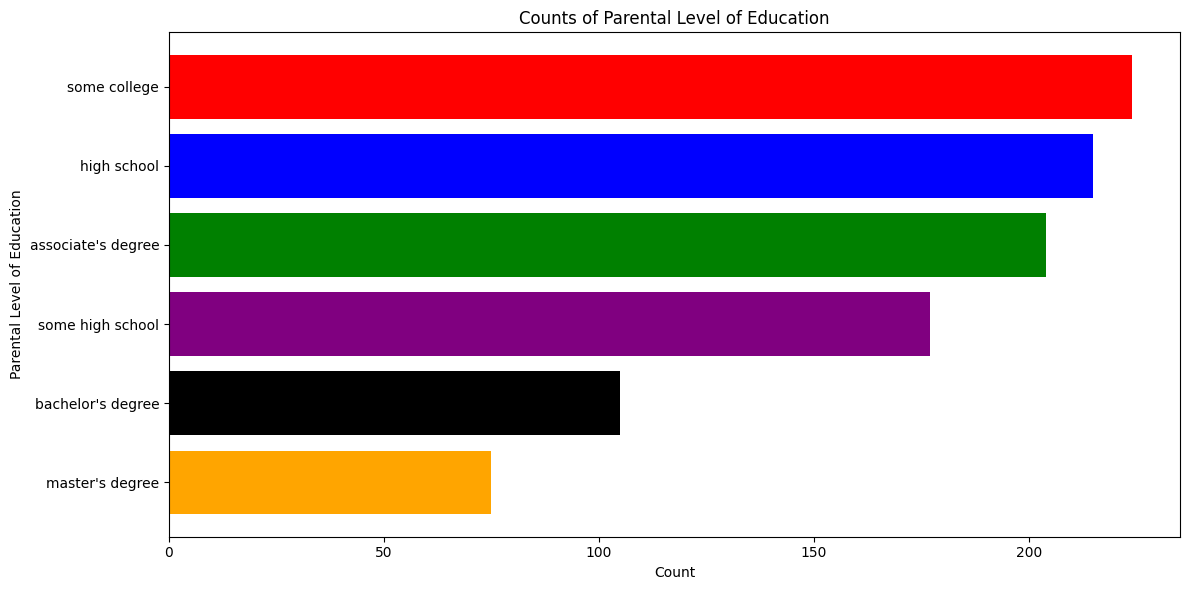

In [54]:
parental_education_counts = {'some college' : 224,"high school":215, "associate's degree": 204, "some high school":177, "bachelor's degree":105,"master's degree" :75}

color = ["red", "blue", 'green', 'purple', 'black', "orange"]
labels = list(parental_education_counts.keys())

# Plot the count chart
plt.figure(figsize=(12, 6))
plt.barh(labels, list(parental_education_counts.values()), color=color)
plt.xlabel('Count')
plt.ylabel('Parental Level of Education')
plt.title('Counts of Parental Level of Education')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest level of education at the top

plt.tight_layout()
plt.show()


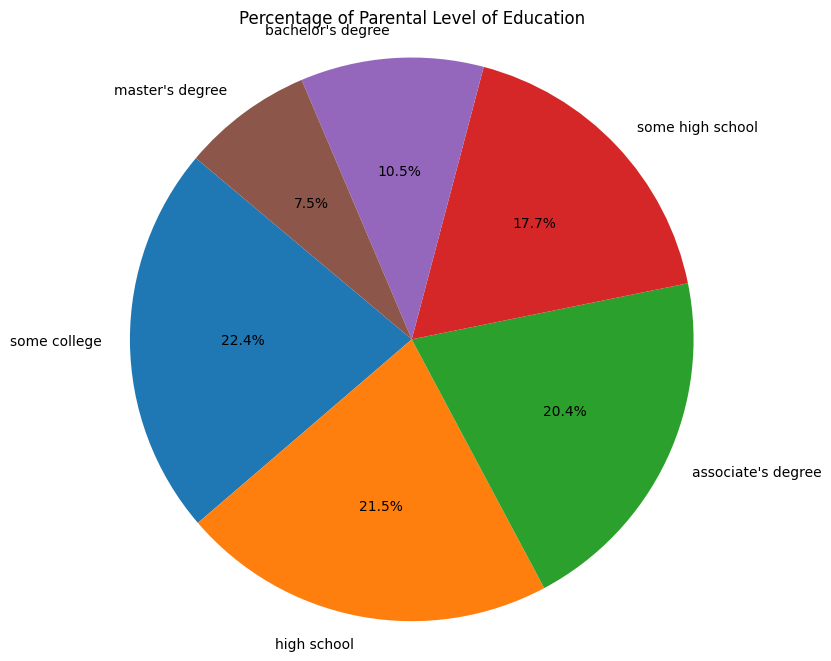

In [55]:
total_count = sum(parental_education_counts.values())

percentages = [(count / total_count) * 100 for count in parental_education_counts.values()]
labels = list(parental_education_counts.keys())

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Parental Level of Education')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [56]:
df['Test Preparation Course'].value_counts()

none         656
completed    344
Name: Test Preparation Course, dtype: int64

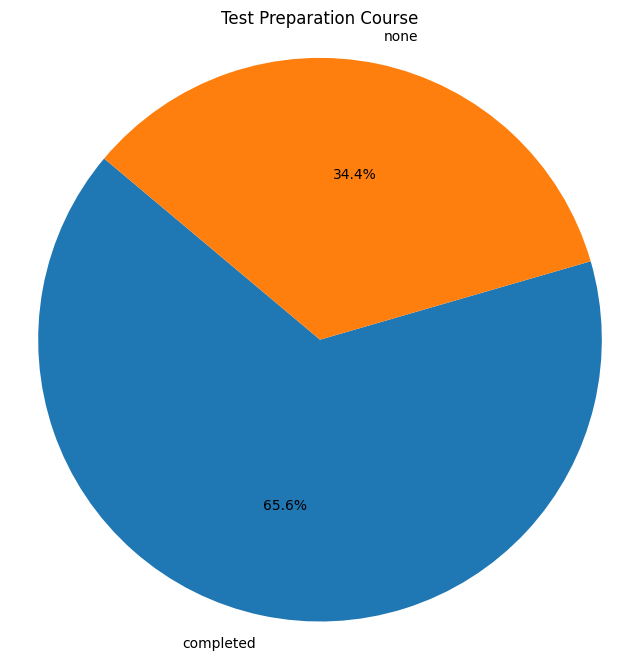

In [57]:
Test_Preparation_Course = {
    'completed': 656,
    'none': 344
}

# Calculate total count
total_count = sum(Test_Preparation_Course.values())

percentages = [(count / total_count) * 100 for count in Test_Preparation_Course.values()]

labels = list(Test_Preparation_Course.keys())

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Test Preparation Course')
plt.axis('equal')
plt.show()


In [58]:
df['Math Score'].value_counts().nunique()


29

In [59]:
df['Writing Score'].value_counts().nunique()


28

In [60]:
df['Reading Score'].value_counts().nunique()

30

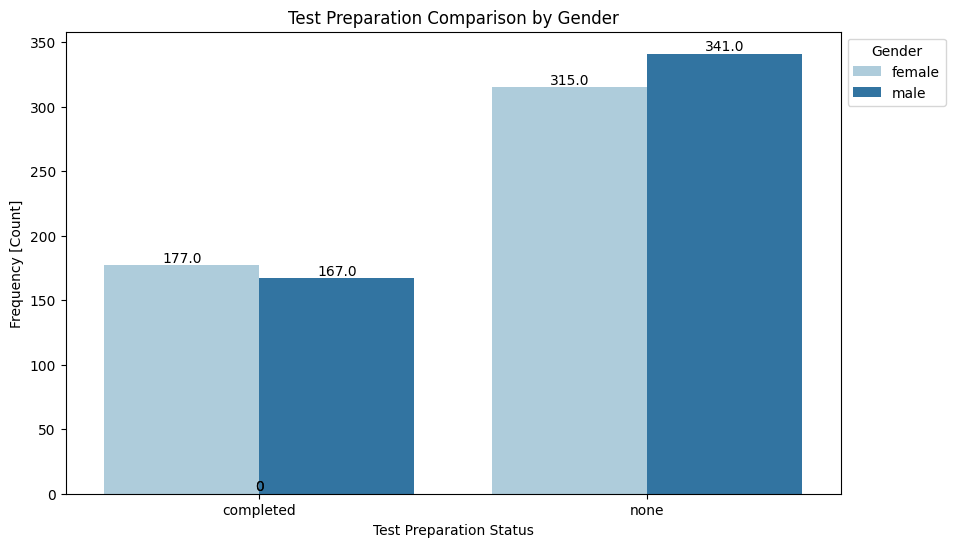

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot countplot
ax = sns.countplot(data=df, x='Test Preparation Course', hue='Gender', palette='Paired')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the title and labels
plt.title("Test Preparation Comparison by Gender")
plt.xlabel("Test Preparation Status")
plt.ylabel("Frequency [Count]")

# Move the legend outside the plot
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1, 1))

# Show plot
plt.show()


<ipython-input-62-60cf1cf2dc94>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Gender', y='Math Score', palette='Paired')


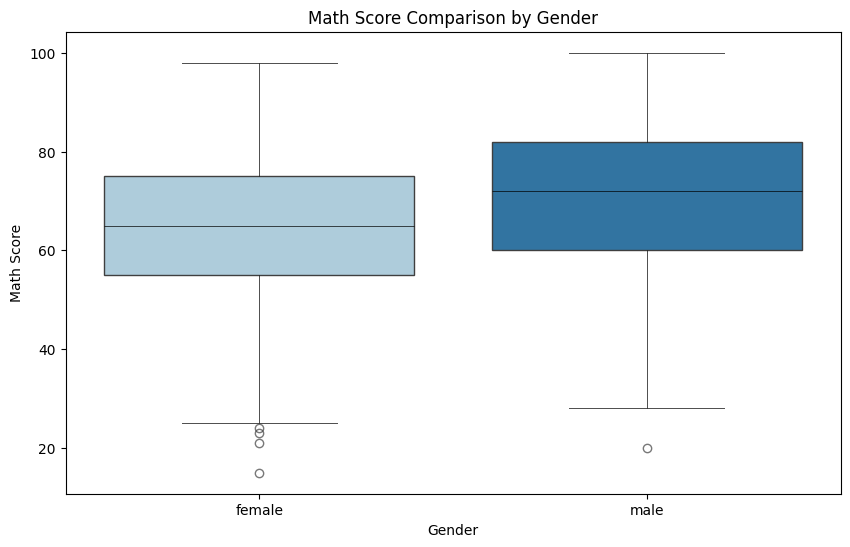

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

ax = sns.boxplot(data=df, x='Gender', y='Math Score', palette='Paired')

# Add labels to the outliers
for line in ax.get_lines():
    line.set_color('black')
    line.set_alpha(0.7)
    line.set_linewidth(0.7)

# Set the title and labels
plt.title("Math Score Comparison by Gender")
plt.xlabel("Gender")
plt.ylabel("Math Score")

plt.show()

<ipython-input-63-ee05eede1bfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Gender', y='Writing Score', palette='Paired')


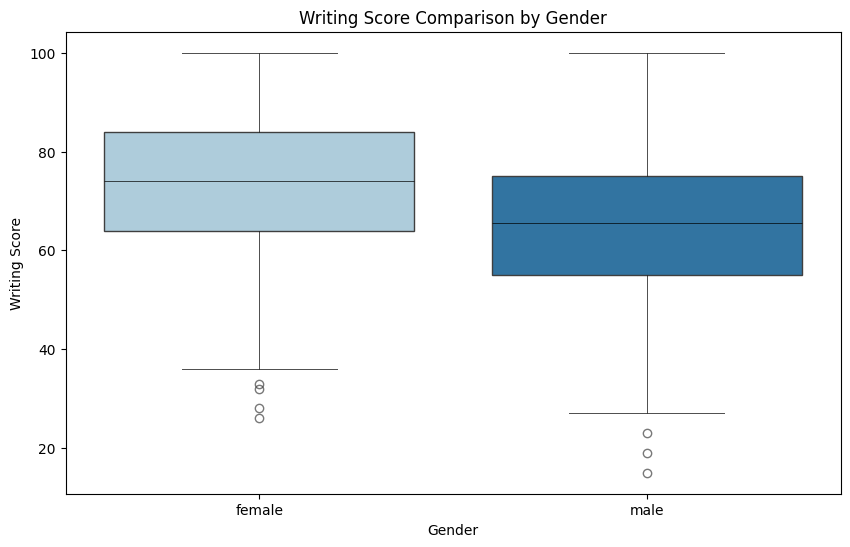

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

ax = sns.boxplot(data=df, x='Gender', y='Writing Score', palette='Paired')

# Add labels to the outliers
for line in ax.get_lines():
    line.set_color('black')
    line.set_alpha(0.7)
    line.set_linewidth(0.7)

# Set the title and labels
plt.title("Writing Score Comparison by Gender")
plt.xlabel("Gender")
plt.ylabel("Writing Score")

plt.show()


<ipython-input-64-714f4268ddad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Gender', y='Reading Score', palette='Paired')


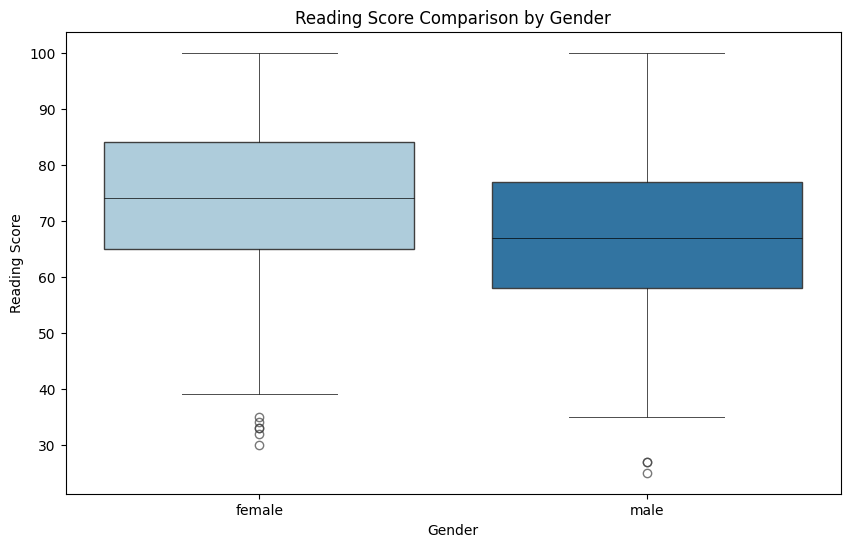

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

ax = sns.boxplot(data=df, x='Gender', y='Reading Score', palette='Paired')

# Add labels to the outliers
for line in ax.get_lines():
    line.set_color('black')
    line.set_alpha(0.7)
    line.set_linewidth(0.7)

# Set the title and labels
plt.title("Reading Score Comparison by Gender")
plt.xlabel("Gender")
plt.ylabel("Reading Score")

plt.show()
